## OVERVIEW: DATA ANALYSIS

### This notebook makes a diagnostic of the topic in the current time. 

### After cleaning the data we use and before studying the futurebehaviour or clustering, in this second section I contextualize the  current and worldwide energy scenario.

### In this notebook you find two sections: 
    ### 1.Evolution of  countries in renewable energy consumption
    ### 2.Analysis for the *Generation renowable ratio* for all countries (using TABLEAU): https://public.tableau.com/profile/rub.n5876#!/vizhome/Project5_15761776874140/ratio_consumptionbypopulation
  
### 1st section I plot some countries to check how is the net electricity consumption, renewable and no renewable generation in the last 38 years (from 1980 to 2017).

### 2nd section, you find different kind of graphs (heat maps, ranking, etc.) to understand bette the energetic distribution, export, renewable geneartion around the world.

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the cleaned data

In [2]:
consumption = pd.read_csv('../cleaned_data/consumption.csv')
generation_renewable = pd.read_csv('../cleaned_data/generation_renewable.csv')
generation_norenewable = pd.read_csv('../cleaned_data/generation_fossil.csv')


# 1.Evolution of  countries in renewable energy consumption.

## Plot some important countries as function of:

**Consumption**

**Generation Renewable**

**Generation Fossile**


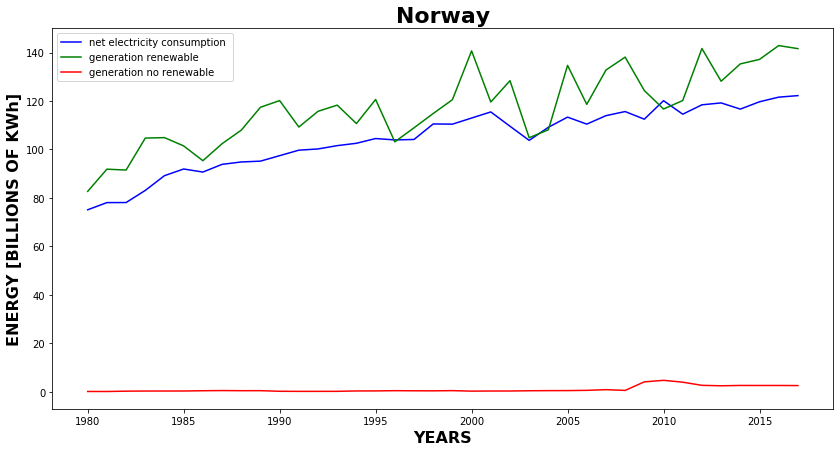

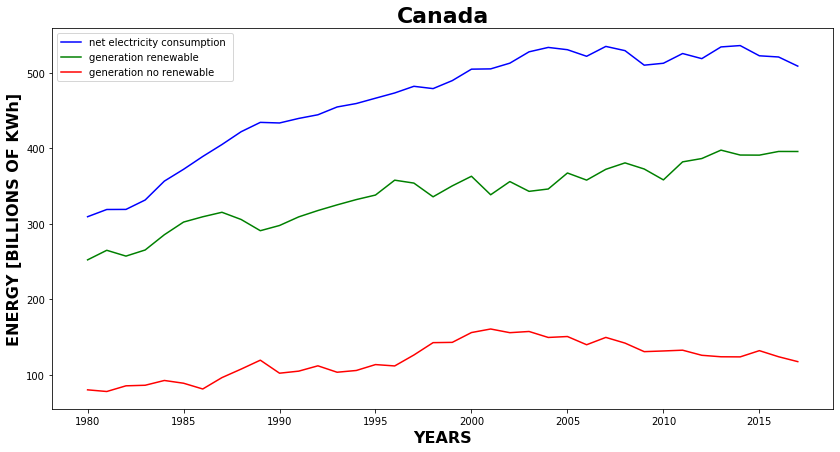

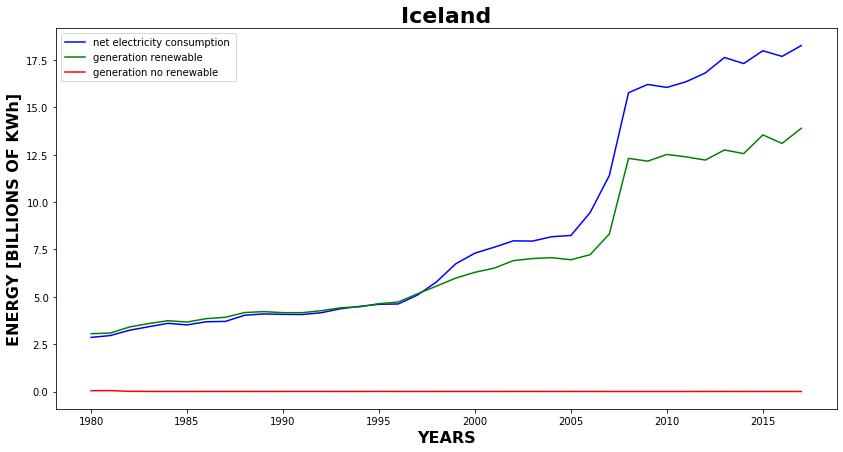

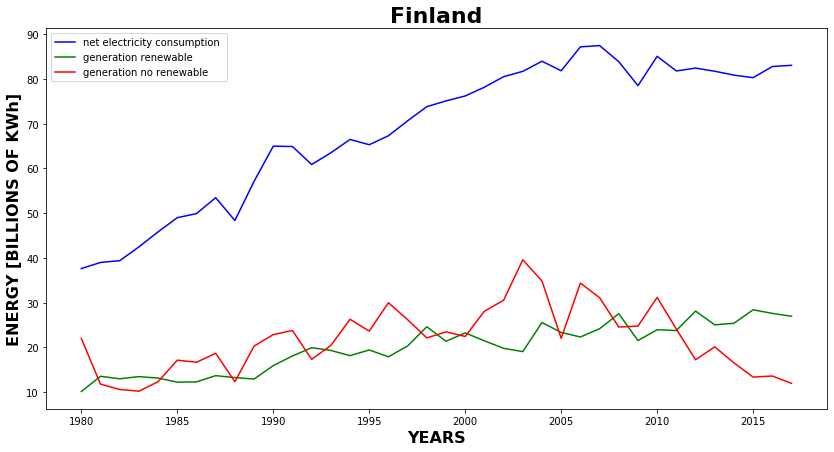

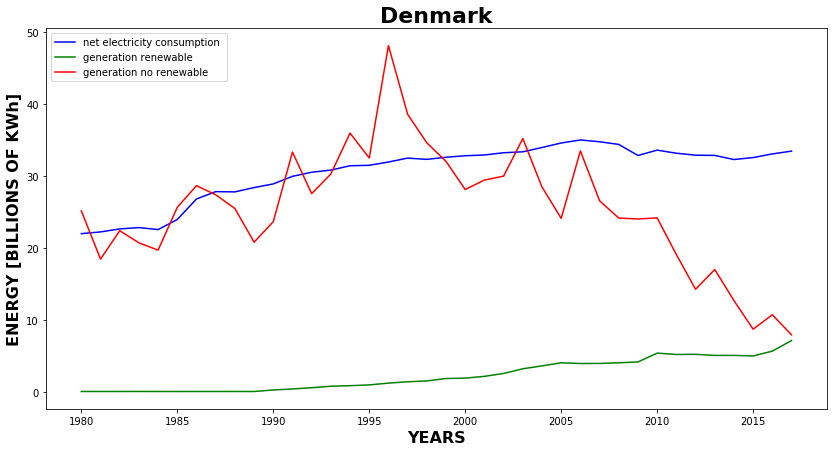

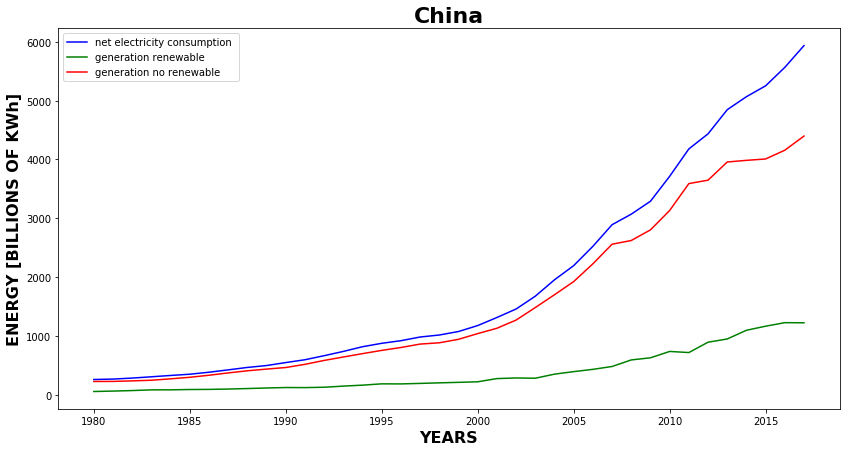

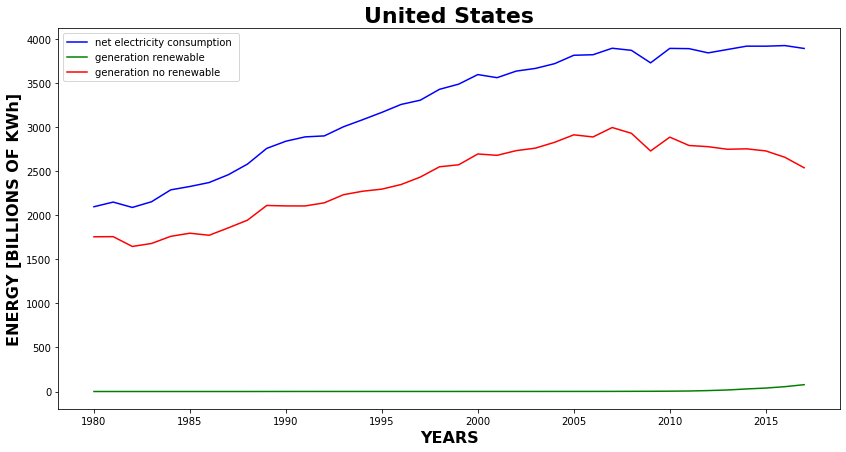

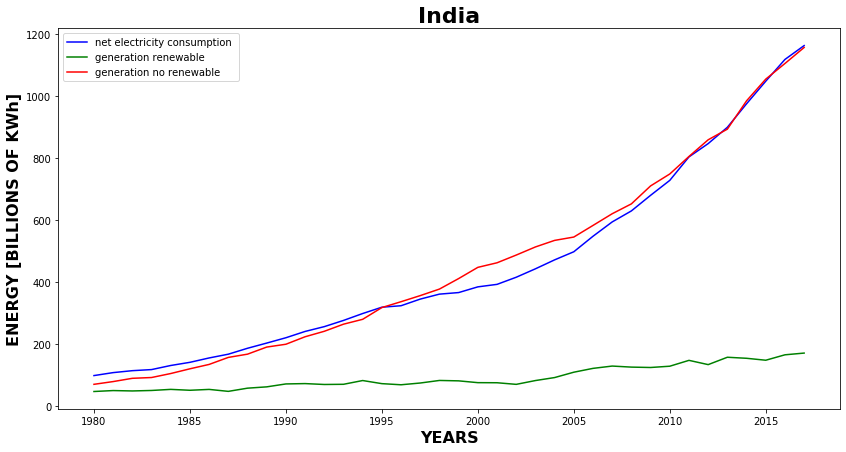

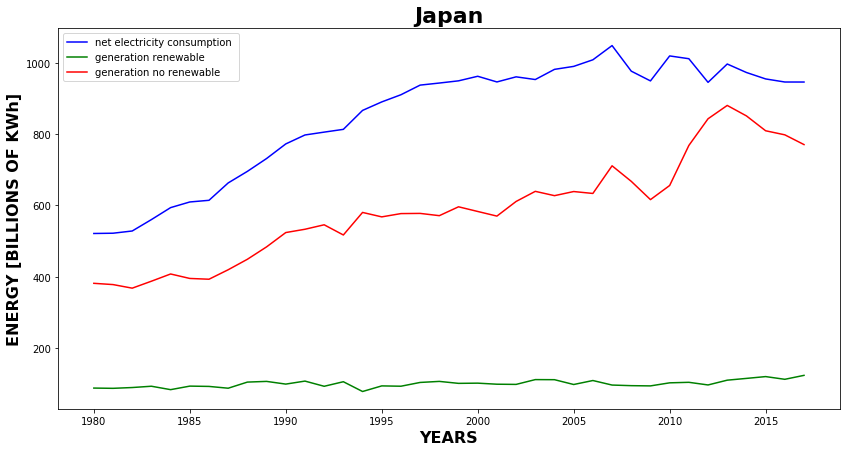

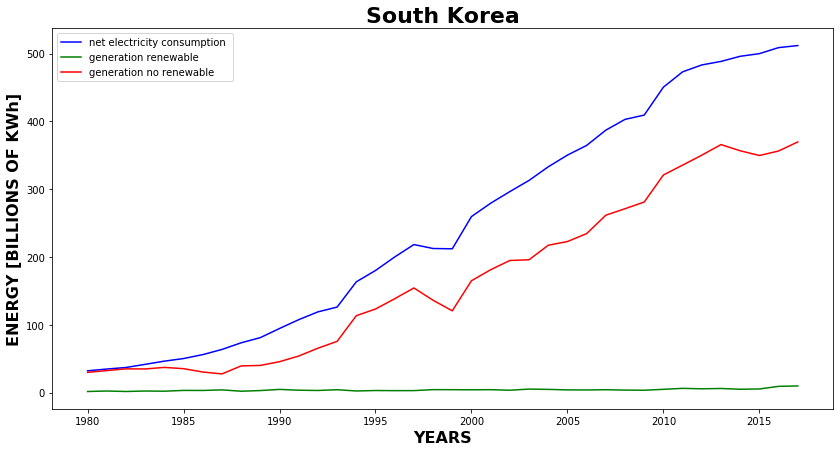

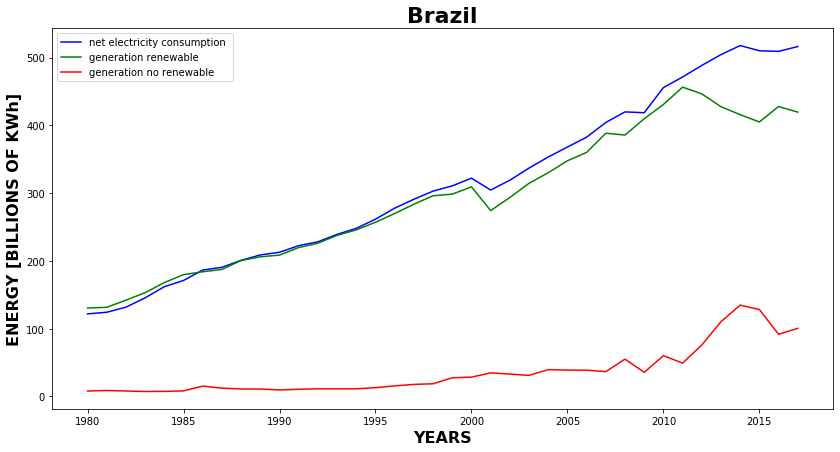

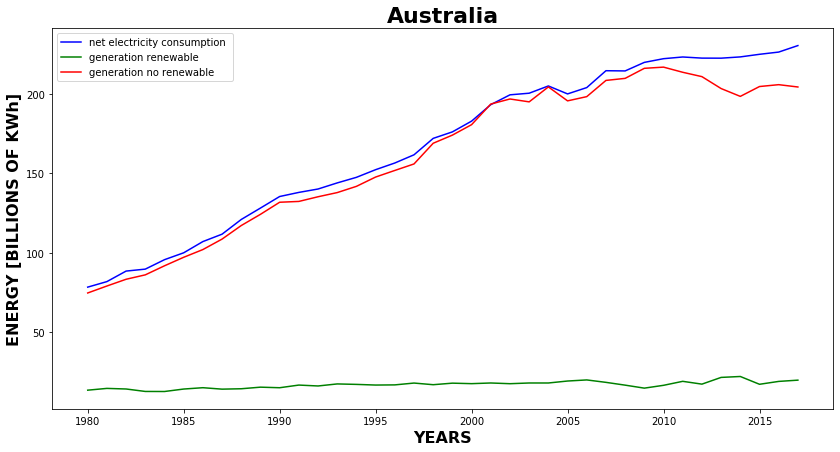

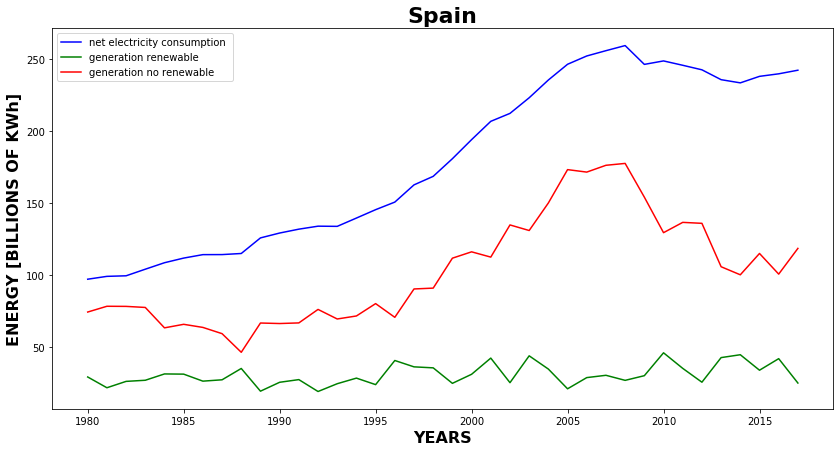

In [8]:
countries= list(['Norway','Canada','Iceland','Finland','Denmark','China','United States','India','Japan','South Korea','Brazil','Australia','Spain'])

t = np.arange(1980,2018,1)
for item in countries:
    fig,ax = plt.subplots(1, figsize=(14,7))
    plt.plot(t,consumption[item], 'b', label= 'net electricity consumption ')
    plt.plot(t,generation_renewable[item], 'g', label='generation renewable')
    plt.plot(t,generation_norenewable[item], 'r', label='generation no renewable')
    plt.legend = ax.legend(loc='upper left')
    plt.xlabel('YEARS',fontsize=16,fontweight='bold')
    plt.ylabel('ENERGY [BILLIONS OF KWh]',fontsize=16,fontweight='bold')
    plt.title(item,fontsize=22,fontweight='bold')
    fig.savefig(f'../explored_data/plots_countries/{item}.png')

plt.show()


#### It can be distinguish two kind of countries: good and bad ones.

#### The good countries are where the renewable generation of energy can converge with the net eletricity consumption.

#### The bad countries are where the renewable generation of energy is almost impossible to  converge with the net eletricity consumption.

# IMPLEMENTATION IDEA: Through an attribute, system could know if it is worth make the algorithm to predict the sustainability of a country

## Converge feature : 
## Absolute_energic_variation (RE) > Absolute_energic_variation(consumption)
------------------------------------------------------------------------------------------------------------

# 2. Analysis for the *Generation renowable ratio* for all countries (using TABLEAU): 

### Create a 'CLEAN RATIO' that measures the countries which spent more renewable energy from the total consumption

## With this data we show a current pictures of the countries as function of the kind of energy consumped in 2017 as function of total net electricity and population.


In [4]:
GNRE2017 = generation_norenewable.loc[generation_norenewable.year ==2017]
GRE2017 = generation_renewable.loc[generation_renewable.year==2017]
consumption2017 = consumption.loc[consumption.year==2017]
population2017 = population.loc[population.year==2017] 
INRE2017 = installations_norenewable.loc[installations_norenewable.year==2017]
IRE2017 = installations_renewable.loc[installations_renewable.year==2017]

features_ratio = [GNRE2017,GRE2017,consumption2017, population2017,INRE2017,IRE2017]

def update(df):
    df = df.transpose()
    header = df.iloc[0]
    df =df[1:]
    df.rename(columns =header,inplace=True)
    df.reset_index(inplace=True)
    df = df.rename(columns={'index':'country',2017.0:'Value in Billion of Kwh'})
    return df

data_ratios = []
for item in features_ratio:
    data_ratios.append(update(item))
    

NameError: name 'population' is not defined

In [ ]:
#MERGE all features in one just table 
for i in (range(len(data_ratios)-1)):
    datamaster = data_ratios[i].merge(data_ratios[i+1],how ='inner',on='country')
    data_ratios[i+1] = datamaster 
ad = ['country','GNRE2017','GRE2017','consumption2017', 'population2017','INRE2017','IRE2017']
datamaster.columns = ad

In [ ]:
datamaster

In [ ]:


#CREATE FOLLOWING COLUMNS: RATIO CLEAN COUNTRY GENERATION, RATIO CLEAN COUNTRY INSTALLATION, RATIO CONSUMPTION BY POPULATION

datamaster['ratio_renewable_energy'] = 100*datamaster.GRE2017/datamaster.consumption2017
datamaster['ratio_renewable_energy_installation'] = 100*datamaster.IRE2017/datamaster.consumption2017
datamaster['ratio_consumption_by_population'] = 1000*datamaster.consumption2017/datamaster.population2017


In [ ]:
#DROP THE INITIAL COLUMNS, BECAUSE ARE USELESS TO PROVIDE INFORMATION
datamaster.drop('GRE2017',axis=1,inplace=True)
datamaster.drop('consumption2017',axis=1,inplace=True)
datamaster.drop('population2017',axis=1,inplace=True)
datamaster.drop('INRE2017',axis=1,inplace=True)
datamaster.drop('IRE2017',axis=1,inplace=True)



In [ ]:
datamaster.to_csv('../explored_data/datamaster.csv')